In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics, math

In [2]:
r3_df = pd.concat(
    [
        pd.read_csv(f"..\\data\\round3\\prices_round_3_day_{i}.csv", sep=';')
        .assign(timestamp=lambda df: (i * 1_000_000 + df['timestamp']))
        for i in range(3)
    ],
    ignore_index=True
)

# get all columns that start with "VOLCANIC_ROCK"
rock_df = r3_df[r3_df['product'].str.startswith("VOLCANIC_ROCK")].copy()

def TTE(timestamp):
    return 8 - timestamp/1000000

rock_df["TTE"] = rock_df["timestamp"].apply(TTE)
rock_df


,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,TTE
0,0,0,VOLCANIC_ROCK_VOUCHER_10500,99.0,19.0,NaN,NaN,NaN,NaN,100,19,NaN,NaN,NaN,NaN,99.5,0.0,8.0000
4,0,0,VOLCANIC_ROCK_VOUCHER_10000,505.0,19.0,NaN,NaN,NaN,NaN,506,19,NaN,NaN,NaN,NaN,505.5,0.0,8.0000
6,0,0,VOLCANIC_ROCK_VOUCHER_9750,754.0,19.0,NaN,NaN,NaN,NaN,755,19,NaN,NaN,NaN,NaN,754.5,0.0,8.0000
9,0,0,VOLCANIC_ROCK_VOUCHER_9500,1003.0,19.0,NaN,NaN,NaN,NaN,1004,19,NaN,NaN,NaN,NaN,1003.5,0.0,8.0000
11,0,0,VOLCANIC_ROCK_VOUCHER_10250,273.0,19.0,NaN,NaN,NaN,NaN,274,19,NaN,NaN,NaN,NaN,273.5,0.0,8.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419987,2,2999900,VOLCANIC_ROCK_VOUCHER_10500,3.0,20.0,NaN,NaN,NaN,NaN,4,20,NaN,NaN,NaN,NaN,3.5,0.0,5.0001
419990,2,2999900,VOLCANIC_ROCK_VOUCHER_10250,36.0,20.0,NaN,NaN,NaN,NaN,37,20,NaN,NaN,NaN,NaN,36.5,0.0,5.0001
419994,2,2999900,VOLCANIC_ROCK_VOUCHER_10000,180.0,20.0,NaN,NaN,NaN,NaN,181,20,NaN,NaN,NaN,NaN,180.5,0.0,5.0001
419996,2,2999900,VOLCANIC_ROCK_VOUCHER_9750,417.0,20.0,NaN,NaN,NaN,NaN,418,20,NaN,NaN,NaN,NaN,417.5,0.0,5.0001


In [3]:
pivot = rock_df.pivot(index='TTE',
                    columns='product',
                    values='mid_price')
pivot.columns = pivot.columns.str.replace('VOLCANIC_ROCK_VOUCHE', '') 
pivot = pivot.reset_index()
pivot = pivot.sort_values(by='TTE', ascending=False)
pivot

product,TTE,VOLCANIC_ROCK,R_10000,R_10250,R_10500,R_9500,R_9750
29999,8.0000,10503.0,505.5,273.5,99.5,1003.5,754.5
29998,7.9999,10510.0,515.5,279.5,102.5,1010.5,761.5
29997,7.9998,10513.0,516.5,282.5,104.5,1013.5,764.5
29996,7.9997,10517.5,521.5,285.5,106.5,1018.0,768.5
29995,7.9996,10509.5,512.5,279.5,102.5,1010.0,760.5
...,...,...,...,...,...,...,...
4,5.0005,10168.0,182.5,36.5,3.5,668.0,418.5
3,5.0004,10167.0,184.5,36.5,3.5,667.5,418.5
2,5.0003,10167.0,182.5,36.5,3.5,667.5,418.5
1,5.0002,10167.5,185.5,36.5,3.5,667.5,418.5


In [4]:
strike_cols = [col for col in pivot.columns if col.startswith('R')]
strikes = [int(col.split('_')[1]) for col in strike_cols]

for K in strikes:
    pivot[f'm_{K}'] = np.log(K / pivot["VOLCANIC_ROCK"]) / np.sqrt(pivot["TTE"])
pivot

product,TTE,VOLCANIC_ROCK,R_10000,R_10250,R_10500,R_9500,R_9750,m_10000,m_10250,m_10500,m_9500,m_9750
29999,8.0000,10503.0,505.5,273.5,99.5,1003.5,754.5,-0.017351,-0.008621,-0.000101,-0.035486,-0.026302
29998,7.9999,10510.0,515.5,279.5,102.5,1010.5,761.5,-0.017587,-0.008856,-0.000337,-0.035722,-0.026538
29997,7.9998,10513.0,516.5,282.5,104.5,1013.5,764.5,-0.017688,-0.008957,-0.000437,-0.035823,-0.026639
29996,7.9997,10517.5,521.5,285.5,106.5,1018.0,768.5,-0.017839,-0.009109,-0.000589,-0.035974,-0.026790
29995,7.9996,10509.5,512.5,279.5,102.5,1010.0,760.5,-0.017570,-0.008840,-0.000320,-0.035705,-0.026522
...,...,...,...,...,...,...,...,...,...,...,...,...
4,5.0005,10168.0,182.5,36.5,3.5,668.0,418.5,-0.007450,0.003592,0.014368,-0.030388,-0.018772
3,5.0004,10167.0,184.5,36.5,3.5,667.5,418.5,-0.007406,0.003636,0.014412,-0.030345,-0.018729
2,5.0003,10167.0,182.5,36.5,3.5,667.5,418.5,-0.007407,0.003636,0.014412,-0.030345,-0.018729
1,5.0002,10167.5,185.5,36.5,3.5,667.5,418.5,-0.007429,0.003614,0.014391,-0.030367,-0.018751


In [5]:
def norm_cdf(x):
    return 0.5 * (1 + math.erf(x / math.sqrt(2)))

def BSM(S, K, T, sigma):
    """Black-Scholes on European calls."""
    d1 = (np.log(S / K) + (0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm_cdf(d1) - K * norm_cdf(d2)

# find sigma that gives price = 
def iv(S, K, T, price, max_iter=100):
    low = 1e-6
    high = 5.0 
    for i in range(max_iter):
        sigma = (low + high) / 2
        price_est = BSM(S, K, T, sigma)
        if abs(price - price_est) < 1e-6:
            return sigma
        if price_est < price:
            low = sigma
        else:
            high = sigma

In [6]:
strike_cols = [col for col in pivot.columns if col.startswith('R')]
strikes = [int(col.split('_')[1]) for col in strike_cols]

def safe_iv(row):
    try:
        return iv(
            S=row['VOLCANIC_ROCK'],  # or 'volcanic_rock'
            K=K,
            T=row['TTE'],
            price=row[col],
        )
    except KeyError as e:
        print("Row keys:", row.index.tolist())
        print("Failed on column:", col)
        raise e
    
for col, K in zip(strike_cols, strikes):
    print(f"Processing strike {K} from column '{col}'")
    pivot[f'iv_{K}'] = pivot.apply(safe_iv, axis=1)


Processing strike 10000 from column 'R_10000'
Processing strike 10250 from column 'R_10250'
Processing strike 10500 from column 'R_10500'
Processing strike 9500 from column 'R_9500'
Processing strike 9750 from column 'R_9750'


In [19]:
pivot

product,TTE,VOLCANIC_ROCK,R_10000,R_10250,R_10500,R_9500,R_9750,m_10000,m_10250,m_10500,m_9500,m_9750,iv_10000,iv_10250,iv_10500,iv_9500,iv_9750
29999,8.0000,10503.0,505.5,273.5,99.5,1003.5,754.5,-0.017351,-0.008621,-0.000101,-0.035486,-0.026302,0.008897,0.008539,0.008270,0.013473,0.011780
29998,7.9999,10510.0,515.5,279.5,102.5,1010.5,761.5,-0.017587,-0.008856,-0.000337,-0.035722,-0.026538,0.010350,0.008547,0.008219,0.013553,0.011871
29997,7.9998,10513.0,516.5,282.5,104.5,1013.5,764.5,-0.017688,-0.008957,-0.000437,-0.035823,-0.026639,0.009567,0.008611,0.008255,0.013587,0.011909
29996,7.9997,10517.5,521.5,285.5,106.5,1018.0,768.5,-0.017839,-0.009109,-0.000589,-0.035974,-0.026790,0.009865,0.008483,0.008223,0.013638,0.011356
29995,7.9996,10509.5,512.5,279.5,102.5,1010.0,760.5,-0.017570,-0.008840,-0.000320,-0.035705,-0.026522,0.009266,0.008609,0.008241,0.013547,0.011257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,5.0005,10168.0,182.5,36.5,3.5,668.0,418.5,-0.007450,0.003592,0.014368,-0.030388,-0.018772,0.007542,0.007685,0.008419,0.004884,0.007873
3,5.0004,10167.0,184.5,36.5,3.5,667.5,418.5,-0.007406,0.003636,0.014412,-0.030345,-0.018729,0.008038,0.007725,0.008440,0.012046,0.009128
2,5.0003,10167.0,182.5,36.5,3.5,667.5,418.5,-0.007407,0.003636,0.014412,-0.030345,-0.018729,0.007692,0.007725,0.008440,0.012046,0.009128
1,5.0002,10167.5,185.5,36.5,3.5,667.5,418.5,-0.007429,0.003614,0.014391,-0.030367,-0.018751,0.008138,0.007705,0.008430,0.004884,0.008613


In [21]:
long_data = pd.DataFrame()
for K in strikes:
    tmp = pivot[[f"iv_{K}", f"m_{K}", "TTE"]].copy()
    tmp.columns = ['iv', 'm', 'TTE']
    tmp['K'] = K
    long_data = pd.concat([long_data, tmp], axis=0)

long_data.dropna(inplace=True)
long_data.reset_index(drop=True, inplace=True)
# v_t > 0.0075
long_data = long_data[long_data['iv'] > 0.0055].copy()
long_data

,iv,m,TTE,K
0,0.008897,-0.017351,8.0000,10000
1,0.010350,-0.017587,7.9999,10000
2,0.009567,-0.017688,7.9998,10000
3,0.009865,-0.017839,7.9997,10000
4,0.009266,-0.017570,7.9996,10000
...,...,...,...,...
149542,0.007873,-0.018772,5.0005,9750
149543,0.009128,-0.018729,5.0004,9750
149544,0.009128,-0.018729,5.0003,9750
149545,0.008613,-0.018751,5.0002,9750


In [22]:
a, b, c = np.polyfit(long_data['m'], long_data['iv'], 2)
print(f"Polynomial coefficients: {a}, {b}, {c}")

Polynomial coefficients: 4.533411070233317, 0.0029351071136794007, 0.007809293646189443


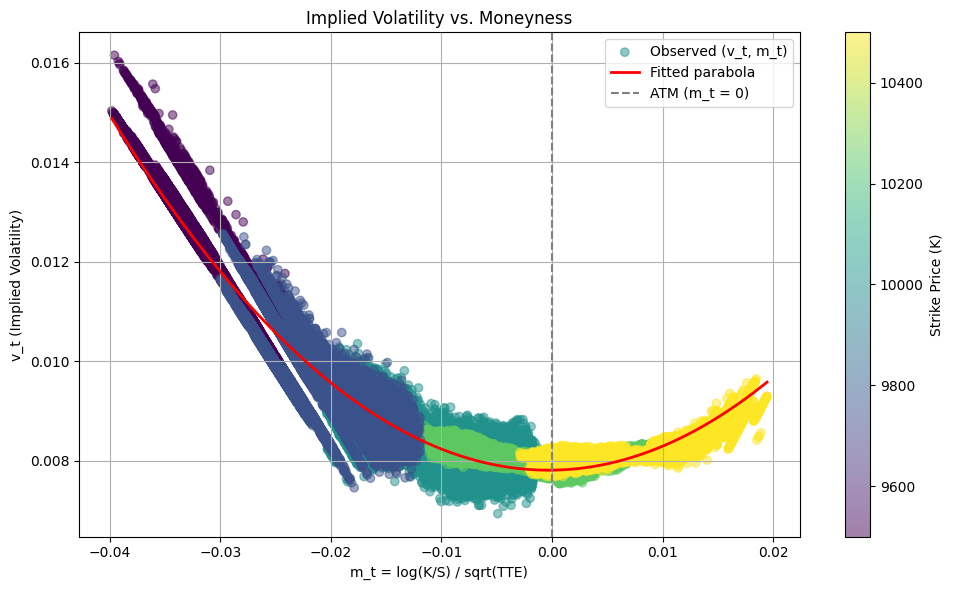

In [23]:
# Create smooth m_t range for the curve
m_vals = np.linspace(long_data['m'].min(), long_data['m'].max(), 500)
v_fitted = a * m_vals**2 + b * m_vals + c

plt.figure(figsize=(10, 6))
scatter = plt.scatter(long_data['m'], long_data['iv'], c = long_data['K'], alpha=0.5, label="Observed (v_t, m_t)")
plt.plot(m_vals, v_fitted, color='red', linewidth=2, label="Fitted parabola")
plt.axvline(0, color='gray', linestyle='--', label='ATM (m_t = 0)')
plt.title("Implied Volatility vs. Moneyness")
plt.xlabel("m_t = log(K/S) / sqrt(TTE)")
plt.ylabel("v_t (Implied Volatility)")
plt.colorbar(scatter, label='Strike Price (K)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
print(f"Base IV = {c:.4%}")

Base IV = 0.7809%


In [25]:
base_ivs = []

for timestamp, group in long_data.groupby('TTE'):
    m_vals = group['m'].values
    v_vals = group['v'].values
    
    if len(m_vals) >= 3:  # need enough points for polyfit
        a, b, c = np.polyfit(m_vals, v_vals, deg=2)
        base_ivs.append({'timestamp': TTE, 'base_iv': c})


KeyError: 'v'

In [30]:
test = rock_df.pivot(index='timestamp',
                    columns='product',
                    values='mid_price')
test.reset_index(inplace=True) 

In [33]:
test[test["timestamp"] == 125900].head(10)

product,timestamp,VOLCANIC_ROCK,VOLCANIC_ROCK_VOUCHER_10000,VOLCANIC_ROCK_VOUCHER_10250,VOLCANIC_ROCK_VOUCHER_10500,VOLCANIC_ROCK_VOUCHER_9500,VOLCANIC_ROCK_VOUCHER_9750
1259,125900,10475.0,478.0,248.0,83.0,975.0,725.0


In [35]:
rock_df[rock_df["timestamp"] == 125900].head(10)

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,TTE
17627,0,125900,VOLCANIC_ROCK_VOUCHER_9500,NaN,NaN,NaN,NaN,NaN,NaN,975,8,976.0,12.0,NaN,NaN,975.0,0.0,7.8741
17630,0,125900,VOLCANIC_ROCK_VOUCHER_9750,NaN,NaN,NaN,NaN,NaN,NaN,725,8,727.0,12.0,NaN,NaN,725.0,0.0,7.8741
17635,0,125900,VOLCANIC_ROCK_VOUCHER_10000,NaN,NaN,NaN,NaN,NaN,NaN,478,8,479.0,12.0,NaN,NaN,478.0,0.0,7.8741
17636,0,125900,VOLCANIC_ROCK_VOUCHER_10250,NaN,NaN,NaN,NaN,NaN,NaN,248,8,249.0,12.0,NaN,NaN,248.0,0.0,7.8741
17637,0,125900,VOLCANIC_ROCK,10474.0,147.0,NaN,NaN,NaN,NaN,10476,104,10477.0,43.0,NaN,NaN,10475.0,0.0,7.8741
17639,0,125900,VOLCANIC_ROCK_VOUCHER_10500,NaN,NaN,NaN,NaN,NaN,NaN,83,8,84.0,12.0,NaN,NaN,83.0,0.0,7.8741
